# Supervised Learning:  The Waze Carpool - SF Pilot
- In this project, I'm trying to build machine learning models based on Kaggle and SMFTA's data: I came up with WAZE Rider San Francisco Pilot to study features of a carpool modelling and make prdedictions that could help the business.
Waze is going the corporate route. The pilot is starting with more than 25,000 employees of select companies that schlep workers from city.

Commute choice: dataset about carpool desicions, e.g., drive alone, car share, shuttle, uber, public transportation
Location: information about users location
Income: total income

In [49]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import linear_model, cross_validation

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [50]:
df = pd.read_csv(os.path.join('..', 'FinalProject-GA', 'TDS_Data1.csv'))

## The Dataset

In [51]:
df

,RESP_NUM,Q2,Q3,TRIPS,Q4_TOTAL,...,ZONE,INTERVIEW_DAY,INTERVIEW_DATE,AGECO,WEIGHT
0,2.0,9,NaN,2,2.0,...,5.0,2,10/6/2014,1,1.043120
1,3.0,9,NaN,11,6.0,...,5.0,2,10/6/2014,2,1.115464
2,4.0,1,1.0,214,NaN,...,NaN,2,10/6/2014,7,1.048985
3,5.0,3,1.0,594,NaN,...,NaN,2,10/6/2014,10,0.930278
4,6.0,9,NaN,6,4.0,...,4.0,2,10/6/2014,4,0.870378
...,...,...,...,...,...,...,...,...,...,...,...
762,1920.0,9,NaN,6,4.0,...,5.0,1,11/9/2014,2,1.115464
763,1921.0,9,NaN,9,4.0,...,5.0,2,11/10/2014,3,0.865878
764,1922.0,9,NaN,5,5.0,...,5.0,2,11/10/2014,1,1.043120
765,1923.0,9,NaN,7,4.0,...,2.0,2,11/10/2014,3,0.865878


In [52]:
df.columns

Index([u'RESP_NUM', u'Q2', u'Q3', u'TRIPS', u'Q4_TOTAL', u'Q5_TOTAL', u'Q4AP',
       u'Q4BP', u'Q4CP', u'Q4DP',
       ...
       u'Q26-5', u'Q27', u'Q28', u'SAMPLE_TYPE', u'LANGUAGE', u'ZONE',
       u'INTERVIEW_DAY', u'INTERVIEW_DATE', u'AGECO', u'WEIGHT'],
      dtype='object', length=224)

In [53]:
print df.count()

RESP_NUM          767
Q2                767
Q3                392
TRIPS             767
Q4_TOTAL          375
                 ... 
ZONE              375
INTERVIEW_DAY     767
INTERVIEW_DATE    767
AGECO             767
WEIGHT            767
dtype: int64


## Data Cleaning and Transformation

In [54]:
##Remove columns
# Selecting only Home and Work - base on carpool purpose , Commute Way - Carpool
df.drop(['SCH', 'SHOP', 'SOC', 'OTH-P-SF', 'DK-P-SF','SHTTLE', 'BIKE', 'WALK', 'SCOOT', 'REL', 'OTH-M-SF', 'DK-M-SF', 
'SF-D1','INTERVIEW_DAY', 'INTERVIEW_DATE', 'LANGUAGE', 'Q4BP', 'Q4CP', 'Q4DP', 'Q4EP', 'Q4FP', 'Q4GP', 'Q4HP', 'Q5BP',
'Q5CP', 'Q5DP', 'Q5EP', 'Q5FP', 'Q5GP', 'Q5HP', 'Q18AP', 'Q18BP', 'Q18CP', 'Q18DP', 'Q18EP', 'Q18FP', 'Q18GP', 'Q18HP', 
'SCH1', 'SHOP1', 'SOC1', 'OTH1-P', 'DK1-P', 'SCH2', 'SHOP2', 'SOC2', 'OTH2-P', 'DK2-P', 'REL1', 'REL2', 'SHTTLE1', 'BIKE1',
'WALK1', 'SCOOT1', 'SHTTLE2', 'BIKE2', 'WALK2', 'SCOOT2', 'OTH1-M', 'OTH2-M', 'DK1-M', 'DK2-M', 'Q18AD', 'Q18BD', 'Q18CD', 
'Q18DD', 'Q18ED', 'Q18FD', 'Q18GD', 'Q18HD', 'OSF1-D1', 'OSF1-D3', 'OSF2-D1', 'OSF2-D3', 'Q22', 'Q26-1', 'Q26-2', 'Q26-3', 
'Q26-4', 'Q26-5', 'SAMPLE_TYPE', 'Q3', 'TRIPS', 'Q4_TOTAL', 'Q5_TOTAL', 'Q4AM', 'Q4BM', 'Q4CM', 'Q4DM', 'Q4EM', 'Q4FM', 
'Q4GM','Q4HM', 'Q5AM', 'Q5BM', 'Q5CM', 'Q5DM', 'Q5EM', 'Q5FM', 'Q5GM', 'Q5HM', 'Q4AD', 'Q4BD', 'Q4CD', 'Q4DD', 'Q4ED',
'Q4FD', 'Q4GD','Q4HD', 'Q5AD', 'Q5BD', 'Q5CD', 'Q5DD', 'Q5ED', 'Q5FD', 'Q5GD', 'Q5HD', 'Q8', 'Q11AP', 'Q11BP', 'Q11CP', 
'Q11DP','Q11EP', 'Q11FP', 'Q11GP', 'Q11HP', 'Q11AM', 'Q11BM', 'Q11CM', 'Q11DM','Q11EM', 'Q11FM', 'Q11GM',
'Q11HM', 'Q14M', 'Q16M-ADJ', 'Q18AM', 'Q18BM', 'Q18CM', 'Q18DM', 
'Q18EM', 'Q18FM', 'Q18GM', 'Q18HM', 'SF-D3'], axis = 1, inplace = True)

In [55]:
df = df.rename(columns={'Q27': 'Income'})
df = df.rename(columns={'RESP_NUM': 'Resp_num'})
df = df.rename(columns={'Q2': 'Location'})
df = df.rename(columns={'Q28': 'Gender'})
df = df.rename(columns={'WORK': 'Work'})
df = df.rename(columns={'HOME': 'Home'})

In [56]:
df.columns

Index([u'Resp_num', u'Location', u'Q4AP', u'Q5AP', u'Work', u'Home',
       u'SFINTMODE', u'DA', u'DO', u'CRSHRE', u'TNC', u'TAXI', u'TRANS',
       u'SF-D2', u'Q6', u'Q10', u'Q11_TOTAL', u'Q12', u'Q19', u'Q13', u'Q15',
       u'Q16M', u'Q17', u'Q18_TOTAL', u'Q9M', u'Q7P', u'9P-ADJ', u'Q14P',
       u'Q16P-ADJ', u'WORK1', u'WORK2', u'HOME1', u'HOME2', u'Q7M', u'Q9M-ADJ',
       u'DA1', u'DA2', u'DO1', u'DO2', u'CRSHRE1', u'CRSHRE2', u'TNC1',
       u'TNC2', u'TAXI1', u'TAXI2', u'TRANS1', u'TRANS2', u'Q7D', u'Q9D',
       u'Q11AD', u'Q11BD', u'Q11CD', u'Q11DD', u'Q11ED', u'Q11FD', u'Q11GD',
       u'Q11HD', u'Q14D', u'Q16D', u'OSF1-D2', u'OSF2-D2', u'OSF-D1',
       u'OSF-D2', u'OSF-D3', u'Q20A', u'Q21A', u'Q21B', u'Q21C', u'Q21D',
       u'Q23', u'Q24-SF', u'Q24-NSF', u'Q24A', u'Q25', u'Income', u'Gender',
       u'ZONE', u'AGECO', u'WEIGHT'],
      dtype='object')

In [57]:
## Dropping additional columns 

In [58]:
df.drop(['Q4AP', 'Q5AP', 'SFINTMODE', 'Q6', 'Q10', 'Q11_TOTAL', 'Q12', 'Q19', 'Q15', 'Q16M',
'Q18_TOTAL', 'Q9M', 'Q7P', '9P-ADJ', 'Q14P', 'Q16P-ADJ', 'Q7M', 'Q9M-ADJ',
'Q7D', 'Q9D', 'Q13', 'Q17', 'Q11AD', 'Q11BD', 'Q11CD', 'Q11DD', 'Q11ED', 'Q11FD',
       'Q11GD', 'Q11HD', 'Q14D', 'Q16D', 'Q20A', 'Q21B', 'Q21D','Q23', 'TAXI', 'TAXI1', 'TAXI2'], axis = 1, inplace = True)

In [59]:
df.columns

Index([u'Resp_num', u'Location', u'Work', u'Home', u'DA', u'DO', u'CRSHRE',
       u'TNC', u'TRANS', u'SF-D2', u'WORK1', u'WORK2', u'HOME1', u'HOME2',
       u'DA1', u'DA2', u'DO1', u'DO2', u'CRSHRE1', u'CRSHRE2', u'TNC1',
       u'TNC2', u'TRANS1', u'TRANS2', u'OSF1-D2', u'OSF2-D2', u'OSF-D1',
       u'OSF-D2', u'OSF-D3', u'Q21A', u'Q21C', u'Q24-SF', u'Q24-NSF', u'Q24A',
       u'Q25', u'Income', u'Gender', u'ZONE', u'AGECO', u'WEIGHT'],
      dtype='object')

### Select San Francisco Location from the dataset

In [60]:
## Eliminating non-san francisco variables
df.drop(['WORK1', 'WORK2', 'HOME1', 'HOME2',
       'DA1', 'DA2', 'DO1', 'DO2', 'CRSHRE1', 'CRSHRE2', 'TNC1',
       'TNC2', 'TRANS1', 'TRANS2'], axis = 1, inplace = True)

In [61]:
## Eliminating trips less than 1 mile
df.drop(['OSF1-D2', 'OSF2-D2', 'OSF-D1' ], axis = 1, inplace = True)

In [62]:
df.columns

Index([u'Resp_num', u'Location', u'Work', u'Home', u'DA', u'DO', u'CRSHRE',
       u'TNC', u'TRANS', u'SF-D2', u'OSF-D2', u'OSF-D3', u'Q21A', u'Q21C',
       u'Q24-SF', u'Q24-NSF', u'Q24A', u'Q25', u'Income', u'Gender', u'ZONE',
       u'AGECO', u'WEIGHT'],
      dtype='object')

In [63]:
df

,Resp_num,Location,Work,Home,DA,...,Income,Gender,ZONE,AGECO,WEIGHT
0,2.0,9,0.0,1.0,0.0,...,1,1,5.0,1,1.043120
1,3.0,9,4.0,2.0,2.0,...,4,2,5.0,2,1.115464
2,4.0,1,NaN,NaN,NaN,...,5,2,NaN,7,1.048985
3,5.0,3,NaN,NaN,NaN,...,4,1,NaN,10,0.930278
4,6.0,9,0.0,2.0,0.0,...,4,1,4.0,4,0.870378
...,...,...,...,...,...,...,...,...,...,...,...
762,1920.0,9,1.0,2.0,2.0,...,2,1,5.0,2,1.115464
763,1921.0,9,2.0,3.0,0.0,...,3,2,5.0,3,0.865878
764,1922.0,9,0.0,2.0,0.0,...,1,2,5.0,1,1.043120
765,1923.0,9,0.0,2.0,0.0,...,2,2,2.0,3,0.865878


In [64]:
df.Location.unique()

array([9, 1, 3, 8, 5, 2, 6, 7, 4])

Select 5-6-9 Location numbers meaning San Francisco and South Bay

In [65]:
subset_df = df[(df.Location == 5)]

subset_df.head()

,Resp_num,Location,Work,Home,DA,...,Income,Gender,ZONE,AGECO,WEIGHT
12,16.0,5,NaN,NaN,NaN,...,3,2,NaN,7,1.048985
26,32.0,5,NaN,NaN,NaN,...,3,1,NaN,10,0.930278
48,59.0,5,NaN,NaN,NaN,...,4,2,NaN,7,1.048985
49,61.0,5,NaN,NaN,NaN,...,4,1,NaN,10,0.930278
52,64.0,5,NaN,NaN,NaN,...,5,2,NaN,7,1.048985


In [66]:
subset_df = df[(df.Location == 6)]

subset_df.head()

,Resp_num,Location,Work,Home,DA,...,Income,Gender,ZONE,AGECO,WEIGHT
43,53.0,6,NaN,NaN,NaN,...,5,1,NaN,8,0.938616
63,76.0,6,NaN,NaN,NaN,...,5,1,NaN,7,1.048985
86,102.0,6,NaN,NaN,NaN,...,1,1,NaN,10,0.930278
88,104.0,6,NaN,NaN,NaN,...,1,2,NaN,10,0.930278
95,112.0,6,NaN,NaN,NaN,...,3,2,NaN,10,0.930278


In [67]:
subset_df = df[(df.Location == 9)]

subset_df.head()

,Resp_num,Location,Work,Home,DA,...,Income,Gender,ZONE,AGECO,WEIGHT
0,2.0,9,0.0,1.0,0.0,...,1,1,5.0,1,1.043120
1,3.0,9,4.0,2.0,2.0,...,4,2,5.0,2,1.115464
4,6.0,9,0.0,2.0,0.0,...,4,1,4.0,4,0.870378
7,10.0,9,3.0,2.0,5.0,...,3,1,3.0,3,0.865878
9,12.0,9,0.0,1.0,1.0,...,1,1,5.0,3,0.865878


In [68]:
## Observing the data - work base trips

In [69]:
df.Work.unique()

array([  0.,   4.,  nan,   3.,   2.,   1.,   8.,   5.])

In [70]:
df.Work.value_counts()

0.0    192
2.0     76
1.0     68
3.0     23
4.0     14
8.0      1
5.0      1
Name: Work, dtype: int64

In [71]:
df[ [df.columns.get_loc('Work')] ]

,Work
0,0.0
1,4.0
2,NaN
3,NaN
4,0.0
...,...
762,1.0
763,2.0
764,0.0
765,0.0


In [72]:
## Getting rid of rows with Location that is not equal to 9 - San Francisco
df = df.drop(df[df.Location < 9 ].index)

In [73]:
df

,Resp_num,Location,Work,Home,DA,...,Income,Gender,ZONE,AGECO,WEIGHT
0,2.0,9,0.0,1.0,0.0,...,1,1,5.0,1,1.043120
1,3.0,9,4.0,2.0,2.0,...,4,2,5.0,2,1.115464
4,6.0,9,0.0,2.0,0.0,...,4,1,4.0,4,0.870378
7,10.0,9,3.0,2.0,5.0,...,3,1,3.0,3,0.865878
9,12.0,9,0.0,1.0,1.0,...,1,1,5.0,3,0.865878
...,...,...,...,...,...,...,...,...,...,...,...
762,1920.0,9,1.0,2.0,2.0,...,2,1,5.0,2,1.115464
763,1921.0,9,2.0,3.0,0.0,...,3,2,5.0,3,0.865878
764,1922.0,9,0.0,2.0,0.0,...,1,2,5.0,1,1.043120
765,1923.0,9,0.0,2.0,0.0,...,2,2,2.0,3,0.865878


In [74]:
## Transforming data to integer
df[['Work', 'Home']] = df[['Work', 'Home']].astype(int)

Selecting Home and Work - base on carpool purpose   

# PROJECT 3

## Exploratory Data Analysis

In [75]:
df.describe()

,Resp_num,Location,Work,Home,DA,...,Income,Gender,ZONE,AGECO,WEIGHT
count,375.000000,375.0,375.000000,375.000000,375.000000,...,375.000000,375.000000,375.000000,375.000000,375.000000
mean,889.388000,9.0,0.954667,2.045333,1.514667,...,2.757333,1.522667,2.997333,3.298667,0.999963
std,593.352081,0.0,1.212931,1.275257,2.241842,...,1.461555,0.500153,1.637624,1.352903,0.110880
min,2.000000,9.0,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.865878
25%,406.500000,9.0,0.000000,1.000000,0.000000,...,1.000000,1.000000,2.000000,2.000000,0.870378
50%,807.500000,9.0,0.000000,2.000000,0.000000,...,3.000000,2.000000,3.000000,3.000000,1.043120
75%,1425.500000,9.0,2.000000,3.000000,2.500000,...,4.000000,2.000000,4.000000,5.000000,1.088087
max,1924.000000,9.0,8.000000,8.000000,13.000000,...,5.000000,2.000000,9.000000,5.000000,1.115464


In [76]:
df.corr()

,Resp_num,Location,Work,Home,DA,...,Income,Gender,ZONE,AGECO,WEIGHT
Resp_num,1.000000,NaN,-0.065795,-0.032020,-0.034172,...,-0.060553,-0.023714,0.029722,0.121043,0.021179
Location,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
Work,-0.065795,NaN,1.000000,0.060105,0.217064,...,0.182311,-0.084247,-0.000061,-0.071567,-0.101878
Home,-0.032020,NaN,0.060105,1.000000,0.300448,...,0.116378,-0.121089,-0.080602,-0.059011,-0.084258
DA,-0.034172,NaN,0.217064,0.300448,1.000000,...,0.185105,-0.102240,0.074661,0.031170,-0.078441
...,...,...,...,...,...,...,...,...,...,...,...
Income,-0.060553,NaN,0.182311,0.116378,0.185105,...,1.000000,-0.085727,-0.062830,0.092192,-0.161931
Gender,-0.023714,NaN,-0.084247,-0.121089,-0.102240,...,-0.085727,1.000000,0.050673,-0.021886,-0.018800
ZONE,0.029722,NaN,-0.000061,-0.080602,0.074661,...,-0.062830,0.050673,1.000000,-0.000846,0.015433
AGECO,0.121043,NaN,-0.071567,-0.059011,0.031170,...,0.092192,-0.021886,-0.000846,1.000000,-0.067236


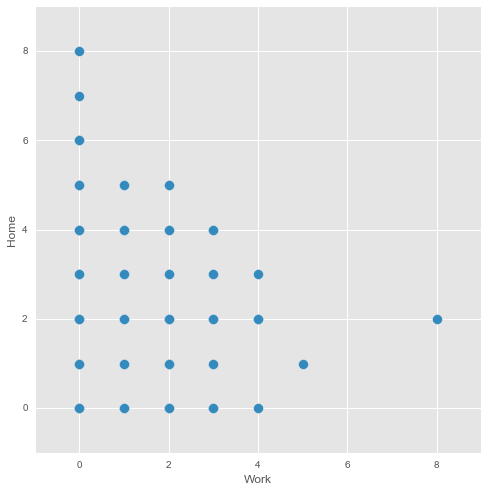

In [77]:
df[ ['Work', 'Home'] ].plot(kind = 'scatter', x = 'Work', y = 'Home', s = 100, figsize = (8, 8))

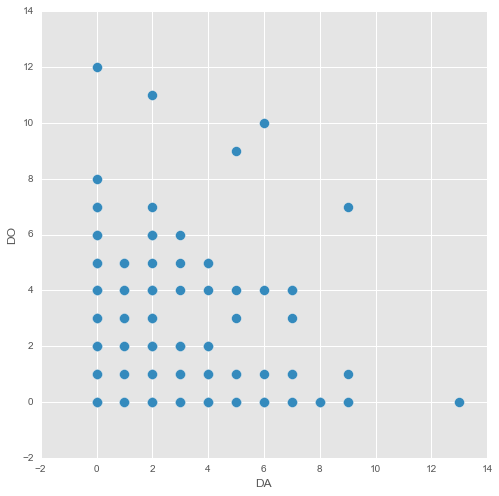

In [78]:
df[ ['DA', 'DO'] ].plot(kind = 'scatter', x = 'DA', y = 'DO', s = 100, figsize = (8, 8))

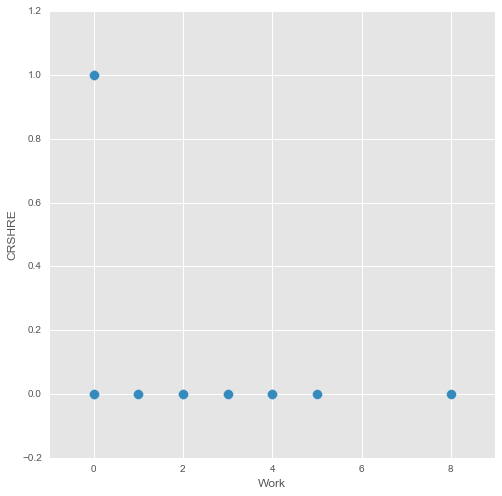

In [79]:
df[ ['Work', 'CRSHRE'] ].plot(kind = 'scatter', x = 'Work', y = 'CRSHRE', s = 100, figsize = (8, 8))

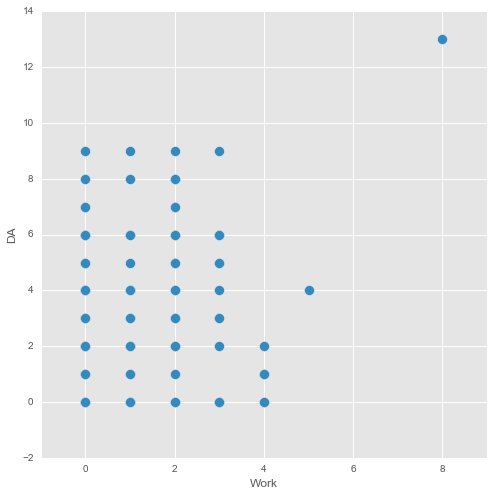

In [80]:
df[ ['Work', 'DA'] ].plot(kind = 'scatter', x = 'Work', y = 'DA', s = 100, figsize = (8, 8))

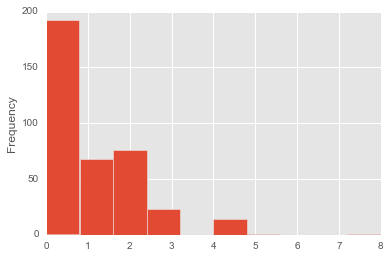

In [81]:
df.Work.plot(kind = 'hist')

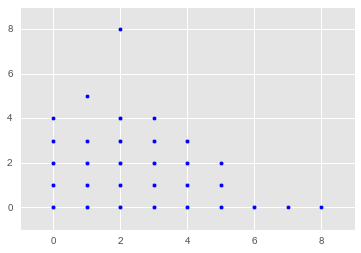

array([[ 1.        ,  0.06010457],
       [ 0.06010457,  1.        ]])

In [82]:
plt.scatter(df.Home, df.Work)
plt.show()
np.corrcoef(df.Home, df.Work)

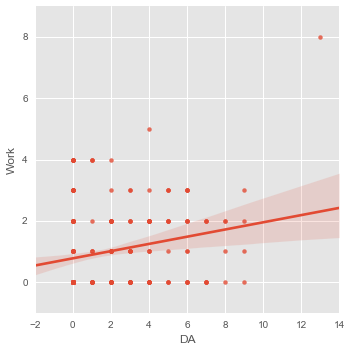

In [83]:
sns.lmplot(x = 'DA', y = 'Work', data = df)

In [84]:
## Dropping the outliers

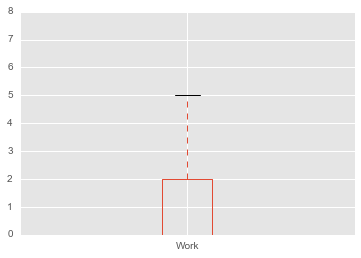

In [85]:
df.Work.plot(kind = 'box')

In [86]:
def drop_outliers(df):
    print 'Dropping outliers'
    print '- n (before) =', len(df)

    Q1 = df.Work.quantile(.25)
    Q2 = df.Work.quantile(.5)
    Q3 = df.Work.quantile(.75)
    IQR = Q3 - Q1

    print '- Q1         =', Q1, '($M)'
    print '- Q2/Median  =', Q2, '($M)'
    print '- Q3         =', Q3, '($M)'

    df.drop(df[df.Work > Q3 + 1.5 * IQR].index, inplace = True)

    print '- n (after)  =', len(df)
    
drop_outliers(df)

Dropping outliers
- n (before) = 375
- Q1         = 0.0 ($M)
- Q2/Median  = 0.0 ($M)
- Q3         = 2.0 ($M)
- n (after)  = 374


In [87]:
def drop_outliers(df):
    print 'Dropping outliers'
    print '- n (before) =', len(df)

    Q1 = df.Home.quantile(.25)
    Q2 = df.Home.quantile(.5)
    Q3 = df.Home.quantile(.75)
    IQR = Q3 - Q1

    print '- Q1         =', Q1, '($M)'
    print '- Q2/Median  =', Q2, '($M)'
    print '- Q3         =', Q3, '($M)'

    df.drop(df[df.Home > Q3 + 1.5 * IQR].index, inplace = True)

    print '- n (after)  =', len(df)
    
drop_outliers(df)

Dropping outliers
- n (before) = 374
- Q1         = 1.0 ($M)
- Q2/Median  = 2.0 ($M)
- Q3         = 3.0 ($M)
- n (after)  = 372


In [88]:
def drop_outliers(df):
    print 'Dropping outliers'
    print '- n (before) =', len(df)

    Q1 = df.DA.quantile(.25)
    Q2 = df.DA.quantile(.5)
    Q3 = df.DA.quantile(.75)
    IQR = Q3 - Q1

    print '- Q1         =', Q1, '($M)'
    print '- Q2/Median  =', Q2, '($M)'
    print '- Q3         =', Q3, '($M)'

    df.drop(df[df.DA > Q3 + 1.5 * IQR].index, inplace = True)

    print '- n (after)  =', len(df)
    
drop_outliers(df)

Dropping outliers
- n (before) = 372
- Q1         = 0.0 ($M)
- Q2/Median  = 0.0 ($M)
- Q3         = 2.0 ($M)
- n (after)  = 344


In [89]:
def drop_outliers(df):
    print 'Dropping outliers'
    print '- n (before) =', len(df)

    Q1 = df.CRSHRE.quantile(.25)
    Q2 = df.CRSHRE.quantile(.5)
    Q3 = df.CRSHRE.quantile(.75)
    IQR = Q3 - Q1

    print '- Q1         =', Q1, '($M)'
    print '- Q2/Median  =', Q2, '($M)'
    print '- Q3         =', Q3, '($M)'

    df.drop(df[df.CRSHRE > Q3 + 1.5 * IQR].index, inplace = True)

    print '- n (after)  =', len(df)
    
drop_outliers(df)

Dropping outliers
- n (before) = 344
- Q1         = 0.0 ($M)
- Q2/Median  = 0.0 ($M)
- Q3         = 0.0 ($M)
- n (after)  = 341


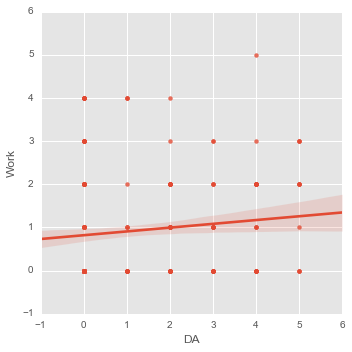

In [90]:
sns.lmplot(x = 'DA', y = 'Work', data = df)

### Tidying up the CommuteChoice

In [91]:
X = df[ ['Work', 'Home' ] ]

In [92]:
ys = pd.get_dummies(df.Work, prefix = None)

In [93]:
ys

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
762,0.0,1.0,0.0,0.0,0.0,0.0
763,0.0,0.0,1.0,0.0,0.0,0.0
764,1.0,0.0,0.0,0.0,0.0,0.0
765,1.0,0.0,0.0,0.0,0.0,0.0


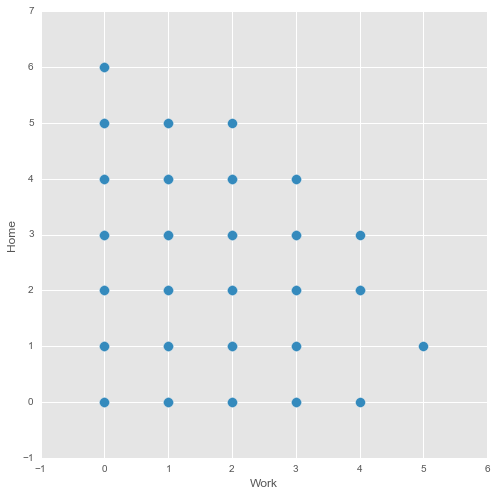

In [148]:
df[ ['Work', 'Home'] ].plot(kind = 'scatter', x = 'Work', y = 'Home', s = 100, figsize = (8, 8))

# PROJECT 4

### Feature matrix and label vector

In [139]:
X = df[ ['DA', 'DO', 'CRSHRE', 'TRANS'] ]
X

,DA,DO,CRSHRE,TRANS
0,0.0,0.0,0.0,2.0
1,2.0,1.0,0.0,4.0
4,0.0,2.0,0.0,0.0
7,5.0,4.0,0.0,0.0
9,1.0,1.0,0.0,0.0
...,...,...,...,...
762,2.0,4.0,0.0,0.0
763,0.0,2.0,0.0,4.0
764,0.0,0.0,0.0,5.0
765,0.0,0.0,0.0,4.0


In [124]:
ys = pd.get_dummies(df.Work, prefix = None)
ys

,0,1,2,3,4,5
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
762,0.0,1.0,0.0,0.0,0.0,0.0
763,0.0,0.0,1.0,0.0,0.0,0.0
764,1.0,0.0,0.0,0.0,0.0,0.0
765,1.0,0.0,0.0,0.0,0.0,0.0


In [140]:
y = df.Work

In [141]:
from sklearn import neighbors, metrics, grid_search, cross_validation

In [142]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform')
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [144]:
def my_second_classifier(row):
    if row.Work < 2:
        return 'DA'
    elif row.Home < 5:
        return 'DO'
    else:
        return 'CRSHRE'

In [146]:
y_hat = df.apply(my_second_classifier, axis = 1)

In [147]:
df[['Income', 'Location', 'DA', 'CRSHRE']]

,Income,Location,DA,CRSHRE
0,1,9,0.0,0.0
1,4,9,2.0,0.0
4,4,9,0.0,0.0
7,3,9,5.0,0.0
9,1,9,1.0,0.0
...,...,...,...,...
762,2,9,2.0,0.0
763,3,9,0.0,0.0
764,1,9,0.0,0.0
765,2,9,0.0,0.0


In [135]:
## As the income increases the carpole usage decrease dramatically

In [ ]:
## future steps will be creating visualization in order to show the results